## Aula 7 - Segmentação por Cor

Iremos aplicar as técnicas de limiarização e segmentação vistas em aula. O OpenCV tem todos os métodos já implementados.

Vamos importar as bibliotecas necessárias:

In [1]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy
from scipy import ndimage

E agora, vamos carregar a imagem da Lenna:

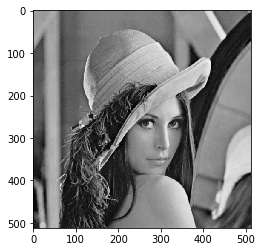

In [2]:
img = cv2.imread('lenna.jpg',0)
plt.imshow(img, cmap='gray')

### Limiarização simples

É o método mais simples de limiarização, onde a segmentação acontece através de um threshold. Todos os tipos vistos em sala são facilmente implementados no OpenCV, precisando apenas mudar um argumento do método chamado.

Os tipos são:
1. [BINARY](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a147222a96556ebc1d948b372bcd7ac59)
2. [BINARY_INV](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a19120b1a11d8067576cc24f4d2f03754)
3. [TRUNC](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576ac7e89a5e95490116e7d2082b3096b2b8)
4. [THRESH_TOZERO](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a0e50a338a4b711a8c48f06a6b105dd98)
5. [THRESH_TOZERO_INV](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a47518a30aae90d799035bdcf0bb39a50)

É importante sempre ler a documentação para entender o que está acontecendo. 

O threshold é definido como o segundo argumento do método [threshold()](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57). O próximo argumento é o valor máximo que é usado em agluns dos tipos. Definiremos 127 como threshold e 255 como o máximo. Para mais detalhes, ler a documentação do método.

Vamos aplicar cada um desses tipos de segmentação na imagem de Lenna e ver o resultado.

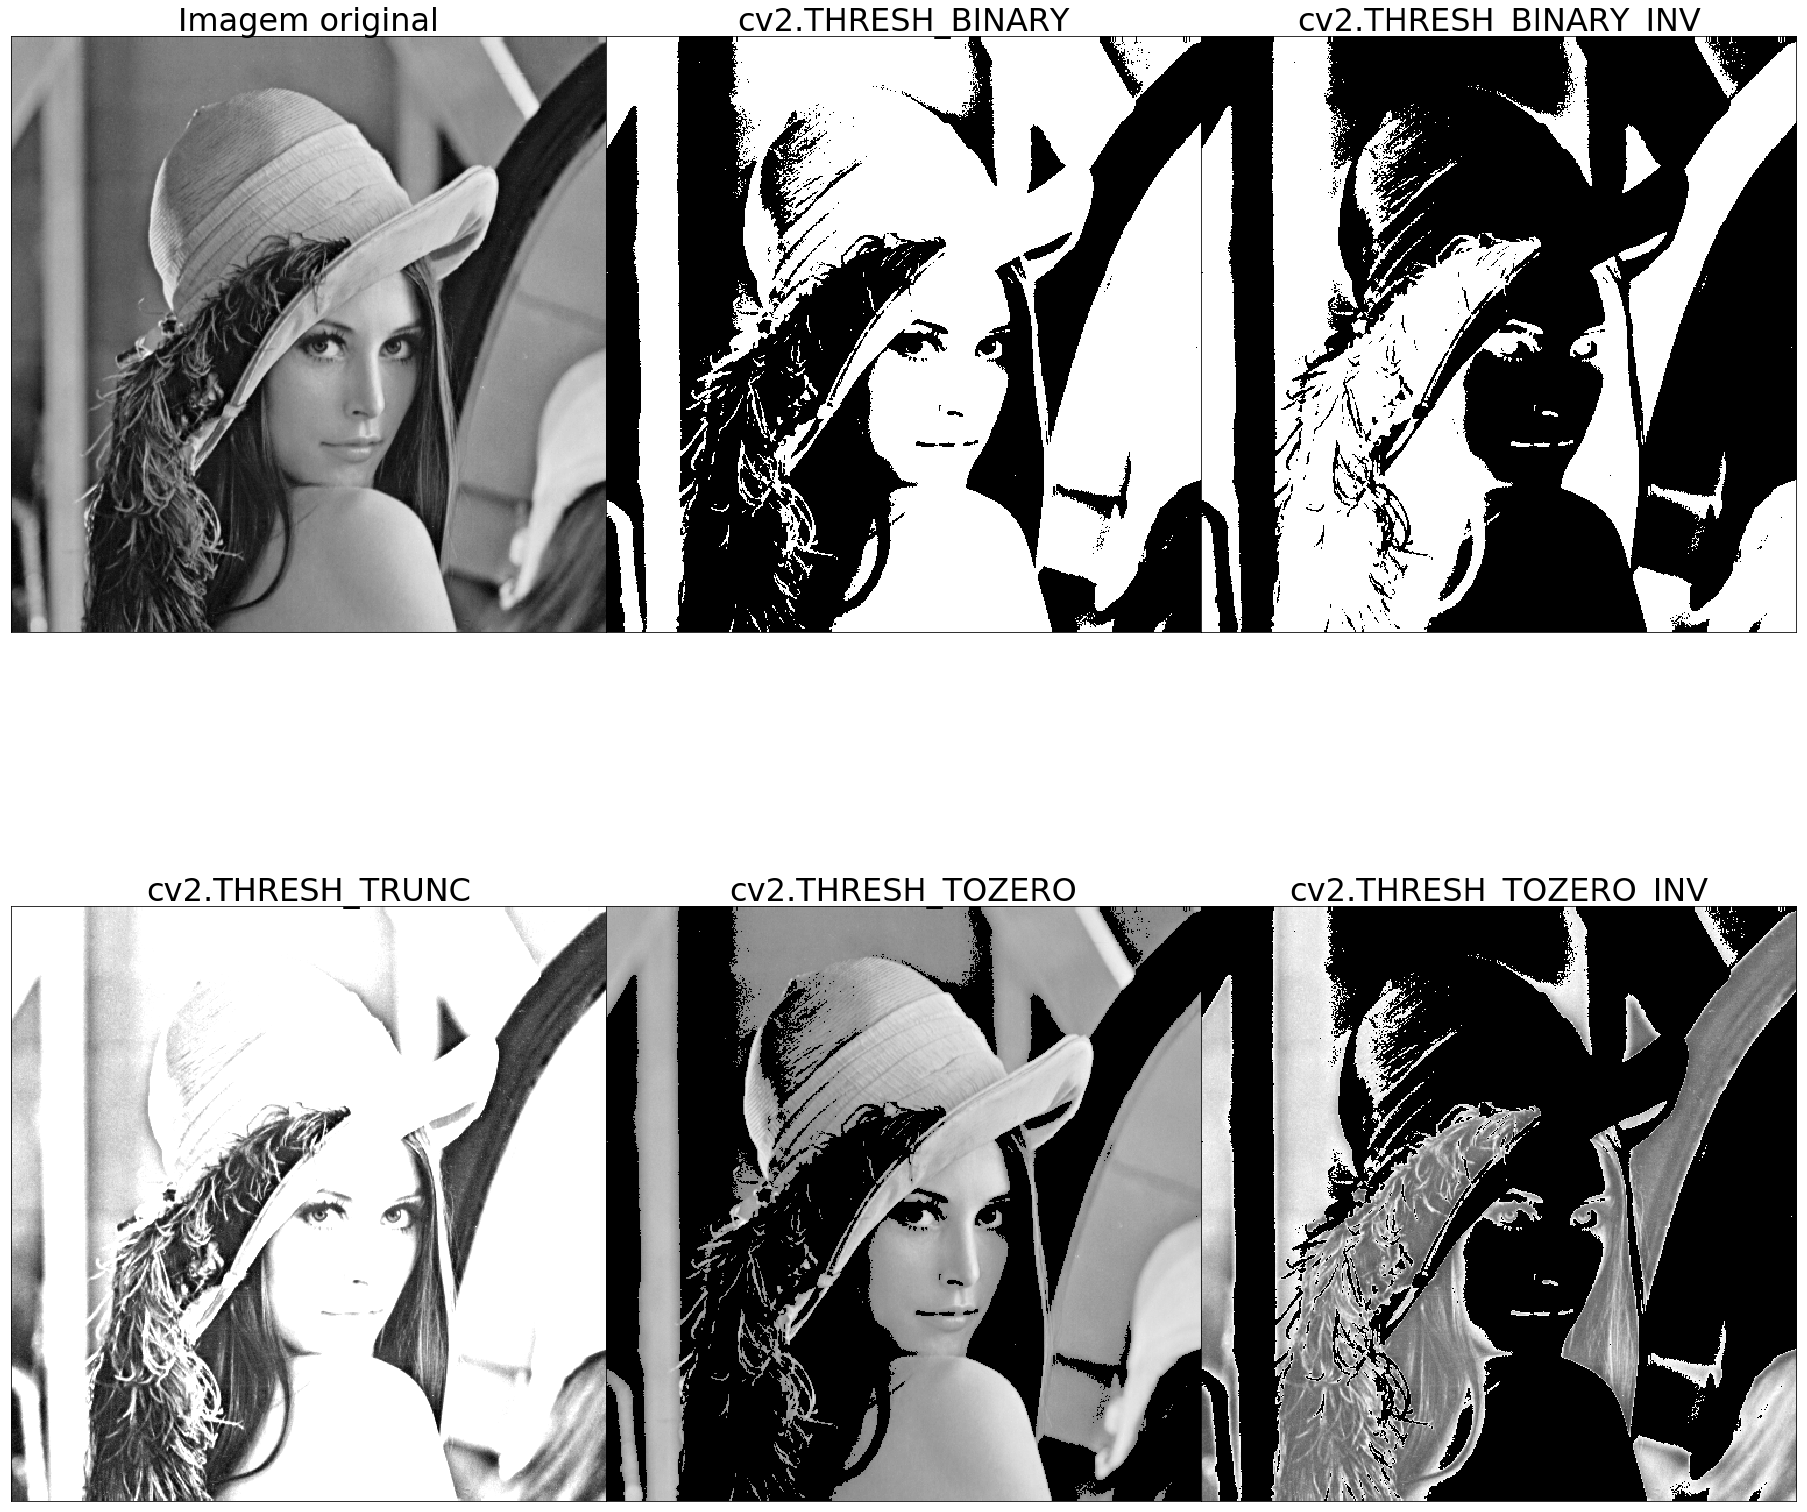

In [3]:
tipo = [None, cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV]
# As flags, na verdade, são valores inteiros. Pra conseguir mostrar a flag de uma forma sem gambiarras
# vamos criar outra lista
tipo_str = ["cv2.THRESH_BINARY", "cv2.THRESH_BINARY_INV", "cv2.THRESH_TRUNC", "cv2.THRESH_TOZERO", "cv2.THRESH_TOZERO_INV"]

fig, ax = plt.subplots(2, 3, figsize=(32, 32))
fig.subplots_adjust(hspace=0, wspace=0)
cnt = 0

for u in range(2):
    for i in range(3):
            if(tipo[cnt] is not None):
                
                img_limiar = cv2.threshold(img,127,255,tipo[cnt])
                
                ax[u, i].xaxis.set_major_locator(plt.NullLocator())
                ax[u, i].yaxis.set_major_locator(plt.NullLocator())
                ax[u, i].set_title(tipo_str[cnt-1], fontsize=32)                
                ax[u, i].imshow(img_limiar[1], cmap="gray")
                
            else:
                ax[u, i].xaxis.set_major_locator(plt.NullLocator())
                ax[u, i].yaxis.set_major_locator(plt.NullLocator())
                ax[u, i].set_title("Imagem original", fontsize=32)                
                ax[u, i].imshow(img, cmap="gray")
            cnt+=1

### Segmentação por cor (usando HSV)

Podemos lembrar que o principal argumento usado a favor do HSV quando falamos de espaços de cores em um momento anterior foi a sua facilidade para segmentação. Como temos apenas um canal pra cor, esse canal acaba tendo informações importantes para encontrar e separar as cores. Vamos trabalhar um exemplo usando uma imagem bem colorida.

Começaremos carregando algumas bibliotecas:

In [4]:
%matplotlib inline
from matplotlib import cm
from matplotlib import colors

E agora vamos ver a nossa imagem de testes:

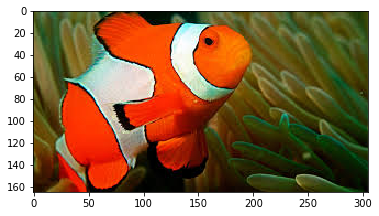

In [5]:
nemo = cv2.imread('index.jpeg')
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)

Precisaremos selecionar duas cores na imagem acima pra fazermos a limiarização. As cores podem ser escolhidas em RGB e depois convertidas pra HSV. Podemos ver abaixo as cores selecionadas:

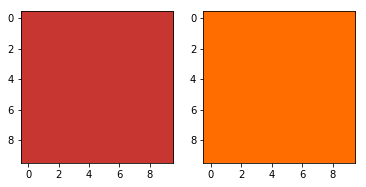

In [6]:
laranja_1 = (1, 190, 200)
laranja_2 = (18, 255, 255)


l1 = np.full((10, 10, 3), laranja_1, dtype=np.uint8) / 255.0
l2 = np.full((10, 10, 3), laranja_2, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(colors.hsv_to_rgb(l1))
plt.subplot(1, 2, 2)
plt.imshow(colors.hsv_to_rgb(l2))
plt.show()

Vamos gerar a limiarização e aplicar uma máscara na imagem:

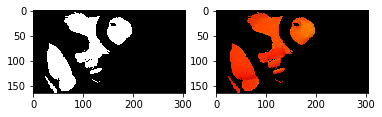

In [8]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

mask = cv2.inRange(hsv_nemo, laranja_1, laranja_2)
result = cv2.bitwise_and(nemo, nemo, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

### K-Means

O objetivo da quantização é reduzir o número de cores em uma imagem. Usaremos o K-Means para isso. Os 3 canais são 3 características (R, G, B) que serão os nosso dados de entrada. Após a clusterização, nós devolvemos os centróides para uma imagem. É ideal ver a documentação do método [kmeans()](https://docs.opencv.org/3.4/d5/d38/group__core__cluster.html#ga9a34dc06c6ec9460e90860f15bcd2f88) para entender o que está acontecendo. 

In [9]:
from __future__ import print_function
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
img = plt.imread('lenna.jpg')
carac = img.reshape((img.shape[0]*img.shape[1],3))
print(carac.shape)
carac = np.float32(carac)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

def kmeans(K):
    ret,indices,centro=cv2.kmeans(carac,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    centro = np.uint8(centro)
    res = centro[indices.flatten()]
    res2 = res.reshape((img.shape))
    plt.imshow(res2)

(262144, 3)


In [10]:
c = interactive(kmeans, K=(0,20))
display(c)

interactive(children=(IntSlider(value=10, description='K', max=20), Output()), _dom_classes=('widget-interact'…

### Connected components labeling

Usaremos o método [connectedComponents()](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html#connectedcomponents), que nos retorna a conectividade de cada componente. Antes precisamos binarizar a imagem:

In [11]:
img = cv2.imread('lenna.jpg', 0)
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary

Agora, podemos gerar a imagem a partir dos componentes conectados:

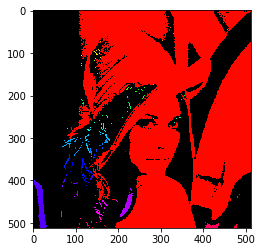

In [12]:
_, indices = cv2.connectedComponents(img)
indices_hue = np.uint8(179*indices/np.max(indices))
canal_vazio = 255*np.ones_like(indices_hue)
img_indices = cv2.merge([indices_hue, canal_vazio, canal_vazio])

img_final = cv2.cvtColor(img_indices, cv2.COLOR_HSV2RGB)
# set bg label to black
img_final[indices_hue==0] = 0

plt.imshow(img_final)